In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import json

In [2]:
#Paths
INPUT_PATH = './data/input/'
OUTPUT_PATH = '../data/input/demands/'


# Load the dataset
dataset = pd.read_csv(INPUT_PATH + '240624_validation_data.csv')

# Select the date for which you want to extract the data
selected_date = '2023-04-02'

# Number of scenarios to generate
num_scenarios = 10


In [3]:
# Extract the time, forecasted demand and actual demand
time = dataset['time']
time = pd.to_datetime(time, utc=True)
forecast_demand = dataset['predicted heat']
actual_demand = dataset['delivered heat']

# Create a dataframe with the necessary columns
df_data = pd.DataFrame({'time' : time, 'actual_demand': actual_demand, 'forecast_demand': forecast_demand})
df_data['hour']=time.dt.hour

# Calculate the error and absolute error
df_data['error']= df_data['actual_demand'] - df_data['forecast_demand']

# Calculate the mean of the error for whole dataset
mu_all = df_data['error'].mean()
sigma_all = df_data['error'].std()
print('Mean of of the error of each hour:', mu_all)
print('Standard deviation of the mean of the error of each hour:', sigma_all)

df_data

Mean of of the error of each hour: -8.39020298257356
Standard deviation of the mean of the error of each hour: 31.42172005784749


,time,actual_demand,forecast_demand,hour,error
0,2023-03-02 16:00:00+00:00,254.990005,255.590651,16,-0.600646
1,2023-03-02 17:00:00+00:00,187.787503,237.501176,17,-49.713673
2,2023-03-02 18:00:00+00:00,230.629171,264.220971,18,-33.591800
3,2023-03-02 19:00:00+00:00,233.329169,236.491860,19,-3.162691
4,2023-03-02 20:00:00+00:00,222.775003,216.179837,20,6.595167
...,...,...,...,...,...
2996,2023-07-12 19:00:00+00:00,55.804167,51.912949,19,3.891219
2997,2023-07-12 20:00:00+00:00,14.191667,37.334409,20,-23.142742
2998,2023-07-12 21:00:00+00:00,22.533334,37.278034,21,-14.744700
2999,2023-07-12 22:00:00+00:00,15.287500,37.703201,22,-22.415700


In [4]:
# Calculate the mean and standard deviation of the error of each hour of a day. 
error = df_data.groupby('hour')['error'].agg(['mean', 'std']).reset_index()
error  = error.rename(columns={'mean': 'mu', 'std': 'sigma'})

# Save the error data to a dictionary
error_dict = error.set_index('hour').to_dict(orient='index')

# Print the error dictionary
error_dict


{0: {'mu': -12.731658021190215, 'sigma': 25.018753157221795},
 1: {'mu': -8.717701939869812, 'sigma': 25.787822594592562},
 2: {'mu': 38.62809145641247, 'sigma': 40.06221098717317},
 3: {'mu': -11.219355528775246, 'sigma': 35.89610812413864},
 4: {'mu': 4.6619634940865975, 'sigma': 29.89150310430875},
 5: {'mu': -3.1503448513536596, 'sigma': 30.62503489088334},
 6: {'mu': -11.665524616604312, 'sigma': 28.687483429676817},
 7: {'mu': -8.965185204385374, 'sigma': 30.89163216771525},
 8: {'mu': -4.254730131452734, 'sigma': 29.0944311173442},
 9: {'mu': -9.849400683302798, 'sigma': 33.982800569041345},
 10: {'mu': -16.93716965553407, 'sigma': 31.972997351520558},
 11: {'mu': -11.808679656691835, 'sigma': 27.301664271959485},
 12: {'mu': -14.417149987864374, 'sigma': 29.132160670687032},
 13: {'mu': -11.036739802937781, 'sigma': 27.055038468354763},
 14: {'mu': -14.235238982654698, 'sigma': 29.627671262886945},
 15: {'mu': -12.303575238253774, 'sigma': 33.18363957415679},
 16: {'mu': -7.271

In [5]:
# Extract the data for the selected date
daily_date = df_data[df_data['time'].dt.date == pd.to_datetime(selected_date).date()].reset_index(drop=True)
daily_date = daily_date[['time', 'hour', 'actual_demand', 'forecast_demand', 'error']]
if(len(daily_date)==24):
    print('The selected date has 24 hours')
else:
    print('The selected date does not have 24 hours')
daily_date

The selected date has 24 hours


,time,hour,actual_demand,forecast_demand,error
0,2023-04-02 00:00:00+00:00,0,105.950002,86.890206,19.059796
1,2023-04-02 01:00:00+00:00,1,137.445836,102.670129,34.775707
2,2023-04-02 02:00:00+00:00,2,281.025006,197.108180,83.916826
3,2023-04-02 03:00:00+00:00,3,158.920836,131.411104,27.509732
4,2023-04-02 04:00:00+00:00,4,175.820836,134.362787,41.458049
5,2023-04-02 05:00:00+00:00,5,176.595835,133.354884,43.240951
6,2023-04-02 06:00:00+00:00,6,225.187504,148.670828,76.516676
7,2023-04-02 07:00:00+00:00,7,194.391670,155.766129,38.625540
8,2023-04-02 08:00:00+00:00,8,202.875005,149.413352,53.461652
9,2023-04-02 09:00:00+00:00,9,208.116669,132.527995,75.588675


---

## Methode: Monte Carlo Sampling and Roulette Wheel Mechanism


In [6]:
import numpy as np
import random
from scipy import stats

# Number of intervals
num_intervals = 7

# Store the data
scenarios = []
scenario_probabilities = []
heat_demand_data = {}


# Function to randomly select an interval based on the CDF
def select_interval(cumulative_probabilities):
    rnd = random.random()
    for i, cp in enumerate(cumulative_probabilities):
        if rnd <= cp:
            return i
    return len(cumulative_probabilities) - 1

# Generate scenarios
for scenario_index in range(num_scenarios):
    scenario_name = f"Scenario{scenario_index + 1}"
    scenario = []
    scenario_probability = 1
    
    for t in range(len(daily_date)):
        mu = error_dict[t]['mu']
        sigma = error_dict[t]['sigma']
        
        # Define the intervals
        intervals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, num_intervals + 1)
        interval_centers = (intervals[:-1] + intervals[1:]) / 2
        
        # Calculate probabilities for each interval
        probabilities = [
            stats.norm.cdf(intervals[i + 1], mu, sigma) - stats.norm.cdf(intervals[i], mu, sigma)
            for i in range(len(intervals) - 1)
        ]
        cum_probabilities = np.cumsum(probabilities)
        
        # Select interval index based on cumulative probabilities
        interval_index = select_interval(cum_probabilities)
        
        # Calculate forecast error and add to forecast demand
        forecast_error = interval_centers[interval_index]
        actual_demand = daily_date['forecast_demand'][t] + forecast_error
        scenario.append(actual_demand)
        
        # Multiply the probability of this interval to the scenario probability
        scenario_probability *= probabilities[interval_index]
    
    # Store the scenario and its probability in the dictionary
    heat_demand_data[scenario_name] = {
        "Probability": scenario_probability,
        **{t + 1: value for t, value in enumerate(scenario)}
    }
    # Collect scenario probabilities for normalization
    scenario_probabilities.append(scenario_probability)

# Normalizing the scenario probabilities
total_probability = sum(scenario_probabilities)
for scenario_name in heat_demand_data:
    heat_demand_data[scenario_name]["Probability"] /= total_probability

#heat_demand_data

#Output the scenarios and their normalized probabilities
for scenario_name, data in heat_demand_data.items():
    print(f"{scenario_name}:")
    print(f"  Normalized Probability: {data['Probability']:.4f}")
    print(f"  Values: {[data[t + 1] for t in range(len(daily_date))]}")


Scenario1:
  Normalized Probability: 0.9505
  Values: [95.60319336346564, 93.95242719664112, 235.73627155394212, 120.19174872373398, 139.02475026467286, 156.4545691895976, 112.41603177991018, 120.32240239695605, 170.09670614654394, 93.55047952641544, 83.8455374443859, 135.47790427964097, 130.79938130020423, 141.37889995998694, 130.6125590589945, 182.7060801845854, 162.38762462254167, 176.63372345620172, 139.32999195526955, 155.89442365808762, 101.49525347560485, 54.643711576108316, 65.21602519334516, 73.04324947358121]
Scenario2:
  Normalized Probability: 0.0019
  Values: [52.7139022367997, 93.95242719664112, 270.0753095429477, 212.49602675723335, 113.40346188955107, 130.20453928312617, 137.00530329106175, 146.80094425499772, 120.22053851681103, 151.80670907334346, 83.8455374443859, 88.67505124199614, 130.79938130020423, 118.18886698711142, 130.6125590589945, 182.7060801845854, 162.38762462254167, 204.46390451345837, 162.85261967291171, 196.85130195565944, 83.1941321156152, 71.69331323

In [7]:
# Speichern des Dictionaries in einer JSON-Datei

selected_date = selected_date.replace('-', '')
print(selected_date)


with open(f'{OUTPUT_PATH}heat_demand_scenarios_{selected_date}.json', 'w') as json_file:
    json.dump(heat_demand_data, json_file, indent=4)

# Laden des Dictionaries aus der JSON-Datei
with open(f'{OUTPUT_PATH}heat_demand_scenarios_{selected_date}.json', 'r') as json_file:
    loaded_data = json.load(json_file)

forecast_demand_dict = {
    "heat_demand": {t + 1: demand for t, demand in daily_date['forecast_demand'].items()}
}

# Save to JSON file
with open(f'{OUTPUT_PATH}heat_demand_{selected_date}.json', 'w') as json_file:
    json.dump(forecast_demand_dict, json_file, indent=4)


print(loaded_data)

20230402
{'Scenario1': {'Probability': 0.9505464601369504, '1': 95.60319336346564, '2': 93.95242719664112, '3': 235.73627155394212, '4': 120.19174872373398, '5': 139.02475026467286, '6': 156.4545691895976, '7': 112.41603177991018, '8': 120.32240239695605, '9': 170.09670614654394, '10': 93.55047952641544, '11': 83.8455374443859, '12': 135.47790427964097, '13': 130.79938130020423, '14': 141.37889995998694, '15': 130.6125590589945, '16': 182.7060801845854, '17': 162.38762462254167, '18': 176.63372345620172, '19': 139.32999195526955, '20': 155.89442365808762, '21': 101.49525347560485, '22': 54.643711576108316, '23': 65.21602519334516, '24': 73.04324947358121}, 'Scenario2': {'Probability': 0.0018596261135372188, '1': 52.7139022367997, '2': 93.95242719664112, '3': 270.0753095429477, '4': 212.49602675723335, '5': 113.40346188955107, '6': 130.20453928312617, '7': 137.00530329106175, '8': 146.80094425499772, '9': 120.22053851681103, '10': 151.80670907334346, '11': 83.8455374443859, '12': 88.675

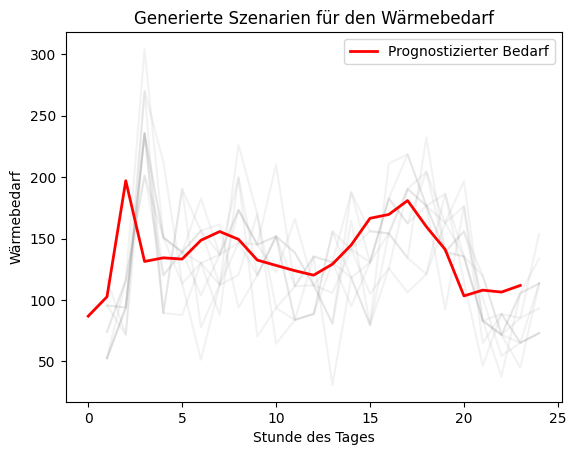

In [8]:
# Convert scenarios to DataFrame for plotting
scenarios_df = pd.DataFrame({name: data for name, data in heat_demand_data.items()}).drop('Probability').T

# Plot all scenarios and forecast demand
plt.plot(scenarios_df.T, color='grey', alpha=0.1)  # alle Szenarien plotten
plt.plot(daily_date['forecast_demand'], color='red', linewidth=2, label='Prognostizierter Bedarf')
plt.xlabel('Stunde des Tages')
plt.ylabel('Wärmebedarf')
plt.title('Generierte Szenarien für den Wärmebedarf')
plt.legend()
plt.show()

---

## Szenarien Reduktion

In [9]:
# Importing the libraries

from sklearn.cluster import KMeans
from scipy.stats import entropy

### Backward Scenario Reduction Methode
Ergänzen.

### Improved k-means Clustering

Ergänzen.